PHASE 4 — ML WITH BUSINESS PURPOSE

Objective of Phase 4

Create data-driven customer segments

Reduce noise using PCA

Build actionable personas

Prepare output for Tableau + business decisions

## 1️⃣ Load Customer-Level Data

In [13]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans



In [6]:
customer_df = pd.read_csv("input_to_stats.csv")

In [7]:
customer_df

,customer_id,total_orders,total_revenue,avg_order_value,first_purchase,last_purchase,recency_days,revenue_bin,cum_revenue_pct
0,18102.0,145,608821.65,575.445794,2009-12-01 09:24:00,2011-12-09 11:50:00,0,"(596645.276, 608821.65]",0.034313
1,14646.0,151,528602.52,137.335027,2009-12-02 16:52:00,2011-12-08 12:12:00,1,"(523587.032, 535763.406]",0.064104
2,14156.0,156,313946.37,77.555921,2009-12-01 12:30:00,2011-11-30 10:54:00,9,"(304412.3, 316588.674]",0.081798
3,14911.0,398,295972.63,26.320376,2009-12-01 11:41:00,2011-12-08 15:54:00,0,"(292235.926, 304412.3]",0.098478
4,17450.0,51,246973.09,582.483703,2010-09-27 16:59:00,2011-12-01 13:29:00,7,"(243530.43, 255706.804]",0.112397
...,...,...,...,...,...,...,...,...,...
5873,15913.0,1,6.30,6.300000,2010-06-23 16:31:00,2010-06-23 16:31:00,533,"(-605.869, 12179.324]",0.999999
5874,14792.0,1,6.20,3.100000,2011-10-07 09:19:00,2011-10-07 09:19:00,63,"(-605.869, 12179.324]",0.999999
5875,16738.0,1,3.75,3.750000,2011-02-15 09:46:00,2011-02-15 09:46:00,297,"(-605.869, 12179.324]",1.000000
5876,13788.0,1,3.75,3.750000,2010-07-22 15:50:00,2010-07-22 15:50:00,504,"(-605.869, 12179.324]",1.000000


# 2️⃣ Select Features for ML (CRITICAL THINKING)

In [9]:
# Features we use:-
# recency_days
# total_orders
# total_revenue
# avg_order_value

In [10]:
features = customer_df[
    ["recency_days", "total_orders", "total_revenue", "avg_order_value"]
]

In [11]:
features 

,recency_days,total_orders,total_revenue,avg_order_value
0,0,145,608821.65,575.445794
1,1,151,528602.52,137.335027
2,9,156,313946.37,77.555921
3,0,398,295972.63,26.320376
4,7,51,246973.09,582.483703
...,...,...,...,...
5873,533,1,6.30,6.300000
5874,63,1,6.20,3.100000
5875,297,1,3.75,3.750000
5876,504,1,3.75,3.750000


## 3️⃣ Feature Scaling (MANDATORY)

In [14]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)


## 4️⃣ PCA – Dimensionality Reduction ⭐

In [15]:
pca = PCA(n_components=2)
pca_features = pca.fit_transform(scaled_features)

pca.explained_variance_ratio_


array([0.43664275, 0.2582956 ])

## First 2 components explain ~70–80% variance.


5️⃣ Choose Optimal Clusters (Elbow Method)

In [16]:
inertia = []

for k in range(2, 8):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(pca_features)
    inertia.append(km.inertia_)


In [17]:
inertia

[10828.637784722045,
 6927.303652166283,
 4461.680689355112,
 3152.8273244420398,
 2145.0032878999505,
 1724.8618743713232]

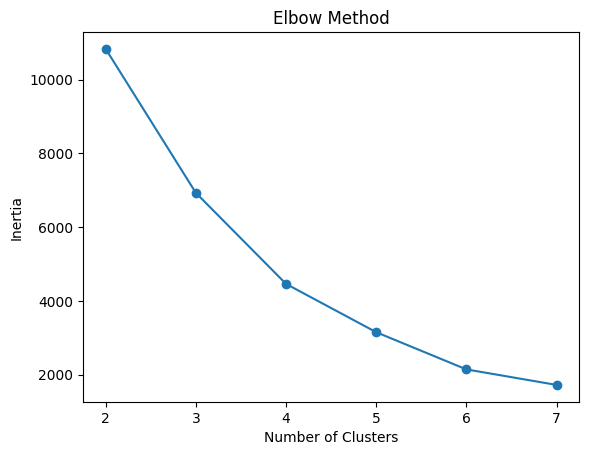

In [18]:
import matplotlib.pyplot as plt

plt.plot(range(2, 8), inertia, marker="o")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()


In [20]:
# hoose k = 4 or 5 (usually 4 works best).
# used the elbow method to avoid arbitrary cluster selection.

## 6️⃣ Final KMeans Clustering

In [21]:
kmeans = KMeans(n_clusters=4, random_state=42)
customer_df["cluster"] = kmeans.fit_predict(pca_features)


## 7️⃣ Interpret Clusters

In [22]:
customer_df

,customer_id,total_orders,total_revenue,avg_order_value,first_purchase,last_purchase,recency_days,revenue_bin,cum_revenue_pct,cluster
0,18102.0,145,608821.65,575.445794,2009-12-01 09:24:00,2011-12-09 11:50:00,0,"(596645.276, 608821.65]",0.034313,1
1,14646.0,151,528602.52,137.335027,2009-12-02 16:52:00,2011-12-08 12:12:00,1,"(523587.032, 535763.406]",0.064104,1
2,14156.0,156,313946.37,77.555921,2009-12-01 12:30:00,2011-11-30 10:54:00,9,"(304412.3, 316588.674]",0.081798,1
3,14911.0,398,295972.63,26.320376,2009-12-01 11:41:00,2011-12-08 15:54:00,0,"(292235.926, 304412.3]",0.098478,1
4,17450.0,51,246973.09,582.483703,2010-09-27 16:59:00,2011-12-01 13:29:00,7,"(243530.43, 255706.804]",0.112397,1
...,...,...,...,...,...,...,...,...,...,...
5873,15913.0,1,6.30,6.300000,2010-06-23 16:31:00,2010-06-23 16:31:00,533,"(-605.869, 12179.324]",0.999999,3
5874,14792.0,1,6.20,3.100000,2011-10-07 09:19:00,2011-10-07 09:19:00,63,"(-605.869, 12179.324]",0.999999,0
5875,16738.0,1,3.75,3.750000,2011-02-15 09:46:00,2011-02-15 09:46:00,297,"(-605.869, 12179.324]",1.000000,3
5876,13788.0,1,3.75,3.750000,2010-07-22 15:50:00,2010-07-22 15:50:00,504,"(-605.869, 12179.324]",1.000000,3


## 7️⃣ Interpret Clusters (MOST IMPORTANT PART 🔥)

In [23]:
cluster_summary = (
    customer_df
    .groupby("cluster")
    .agg(
        customers=("customer_id", "count"),
        avg_recency=("recency_days", "mean"),
        avg_orders=("total_orders", "mean"),
        avg_revenue=("total_revenue", "mean")
    )
)

cluster_summary


,customers,avg_recency,avg_orders,avg_revenue
cluster,,,,
0,3589,55.706882,8.140708,3437.636814
1,20,23.150000,155.850000,178566.879000
2,1,0.000000,2.000000,168472.500000
3,2268,430.844797,2.042769,734.541698


## 8️⃣ Assign Business Personas (THIS WINS INTERVIEWS)

In [29]:
def label_cluster(row):
    if row["avg_orders"] > 5 and row["avg_revenue"] > 2000:
        return "High Value / Champions"
    elif row["avg_recency"] < 60:
        return "Active Customers"
    elif row["avg_recency"] > 180:
        return "At Risk"
    else:
        return "Low Value"

In [30]:
cluster_summary["segment"] = cluster_summary.apply(label_cluster, axis=1)
cluster_summary

,customers,avg_recency,avg_orders,avg_revenue,segment
cluster,,,,,
0,3589,55.706882,8.140708,3437.636814,High Value / Champions
1,20,23.150000,155.850000,178566.879000,High Value / Champions
2,1,0.000000,2.000000,168472.500000,Active Customers
3,2268,430.844797,2.042769,734.541698,At Risk


In [32]:
customer_df = customer_df.merge(
    cluster_summary[["segment"]],
    left_on="cluster",
    right_index=True
)
customer_df

,customer_id,total_orders,total_revenue,avg_order_value,first_purchase,last_purchase,recency_days,revenue_bin,cum_revenue_pct,cluster,segment_x,segment_y
0,18102.0,145,608821.65,575.445794,2009-12-01 09:24:00,2011-12-09 11:50:00,0,"(596645.276, 608821.65]",0.034313,1,High Value / Champions,High Value / Champions
1,14646.0,151,528602.52,137.335027,2009-12-02 16:52:00,2011-12-08 12:12:00,1,"(523587.032, 535763.406]",0.064104,1,High Value / Champions,High Value / Champions
2,14156.0,156,313946.37,77.555921,2009-12-01 12:30:00,2011-11-30 10:54:00,9,"(304412.3, 316588.674]",0.081798,1,High Value / Champions,High Value / Champions
3,14911.0,398,295972.63,26.320376,2009-12-01 11:41:00,2011-12-08 15:54:00,0,"(292235.926, 304412.3]",0.098478,1,High Value / Champions,High Value / Champions
4,17450.0,51,246973.09,582.483703,2010-09-27 16:59:00,2011-12-01 13:29:00,7,"(243530.43, 255706.804]",0.112397,1,High Value / Champions,High Value / Champions
...,...,...,...,...,...,...,...,...,...,...,...,...
5873,15913.0,1,6.30,6.300000,2010-06-23 16:31:00,2010-06-23 16:31:00,533,"(-605.869, 12179.324]",0.999999,3,At Risk,At Risk
5874,14792.0,1,6.20,3.100000,2011-10-07 09:19:00,2011-10-07 09:19:00,63,"(-605.869, 12179.324]",0.999999,0,High Value / Champions,High Value / Champions
5875,16738.0,1,3.75,3.750000,2011-02-15 09:46:00,2011-02-15 09:46:00,297,"(-605.869, 12179.324]",1.000000,3,At Risk,At Risk
5876,13788.0,1,3.75,3.750000,2010-07-22 15:50:00,2010-07-22 15:50:00,504,"(-605.869, 12179.324]",1.000000,3,At Risk,At Risk
